In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import time
from scipy import stats

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

# Import the data

In [2]:
df = pd.read_csv("HomeC.csv",low_memory=False)

# Lets have a look at the data

In [3]:
df.shape

(503911, 32)

In [4]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

# From the df.tail and isnull we realize that all the nulls are present in the last row so its logical to delete the nulls

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [9]:
df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

# df['time'] = pd.to_datetime(df["time"], unit='m') dont work here since there is some issue with the dataset so lets generate our own date time column with min intervals as stated on the datset website.

In [10]:
time = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min')  
time = pd.DatetimeIndex(time)
df['time']=time

In [11]:
df['time']

0        2016-01-01 05:00:00
1        2016-01-01 05:01:00
2        2016-01-01 05:02:00
3        2016-01-01 05:03:00
4        2016-01-01 05:04:00
                 ...        
503905   2016-12-16 03:25:00
503906   2016-12-16 03:26:00
503907   2016-12-16 03:27:00
503908   2016-12-16 03:28:00
503909   2016-12-16 03:29:00
Name: time, Length: 503910, dtype: datetime64[ns]

# Cloud cover is numeric column but from dataset we can see that it has string values in it in the start, the amount of such values is very less, moreover bfill seems to be best option since such values are in the start and they repeat consecutively.

In [12]:
print(df['cloudCover'].value_counts())
#lets replace cloud cover with backfill
df['cloudCover'] = df['cloudCover'].replace('cloudCover', np.nan)
print((df['cloudCover'].isnull().sum()/df.shape[0])*100, '%\n')
df['cloudCover'] = df['cloudCover'].fillna(method='bfill')
df['cloudCover'] = df['cloudCover'].astype(float)
print(df['cloudCover'].value_counts())

0             68236
0.31          49899
1             48705
0.03          33940
0.04          24117
              ...  
0.73            114
0.56             58
0.53             58
cloudCover       58
0.59             57
Name: cloudCover, Length: 78, dtype: int64
0.01150999186362644 %

0.00    68236
0.31    49899
1.00    48705
0.03    33940
0.04    24117
        ...  
0.73      114
0.71      114
0.56       58
0.53       58
0.59       57
Name: cloudCover, Length: 77, dtype: int64


# These three columns that are being dropped below have similar columns in the dataset that present the very similar same data.

In [13]:
df.drop('use [kW]', axis=1, inplace=True)
df.drop('icon', axis=1, inplace=True)
df.drop('Solar [kW]', axis=1, inplace=True)

# I want to have cost as a KPI as well, so i have used the price in PKR for KW/min. Cost incured has the price for total use of electricity in house for each minute, Since we are also generating electricity so i have also made a cost.saved column so that we know what is the savings we are making as we generate electricity, that is also in per min.

In [14]:
df['Cost.Incured']=0.15676*df['House overall [kW]']
df['Cost.Saved']=0.15676*df['gen [kW]']

# All the data types now look good.

In [15]:
df.dtypes

time                   datetime64[ns]
gen [kW]                      float64
House overall [kW]            float64
Dishwasher [kW]               float64
Furnace 1 [kW]                float64
Furnace 2 [kW]                float64
Home office [kW]              float64
Fridge [kW]                   float64
Wine cellar [kW]              float64
Garage door [kW]              float64
Kitchen 12 [kW]               float64
Kitchen 14 [kW]               float64
Kitchen 38 [kW]               float64
Barn [kW]                     float64
Well [kW]                     float64
Microwave [kW]                float64
Living room [kW]              float64
temperature                   float64
humidity                      float64
visibility                    float64
summary                        object
apparentTemperature           float64
pressure                      float64
windSpeed                     float64
cloudCover                    float64
windBearing                   float64
precipIntens

# anova

In [16]:

y = df['House overall [kW]']
model = ols('y ~ C(Q("summary"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => House overall Usage - summary")
display(anova_table)

y = df['gen [kW]']
model = ols('y ~ C(Q("summary"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Energy Generation - summary")
display(anova_table)


Anova => House overall Usage - summary


,sum_sq,df,F,PR(>F)
"C(Q(""summary""))",1462.918537,17.0,77.044636,8.493588e-268
Residual,562815.796864,503892.0,NaN,NaN



Anova => Energy Generation - summary


,sum_sq,df,F,PR(>F)
"C(Q(""summary""))",32.160311,17.0,115.139148,0.0
Residual,8279.150244,503892.0,NaN,NaN


Anova result shows that overall use of electricity and Electric generation against weather summary is significant

# Correlation

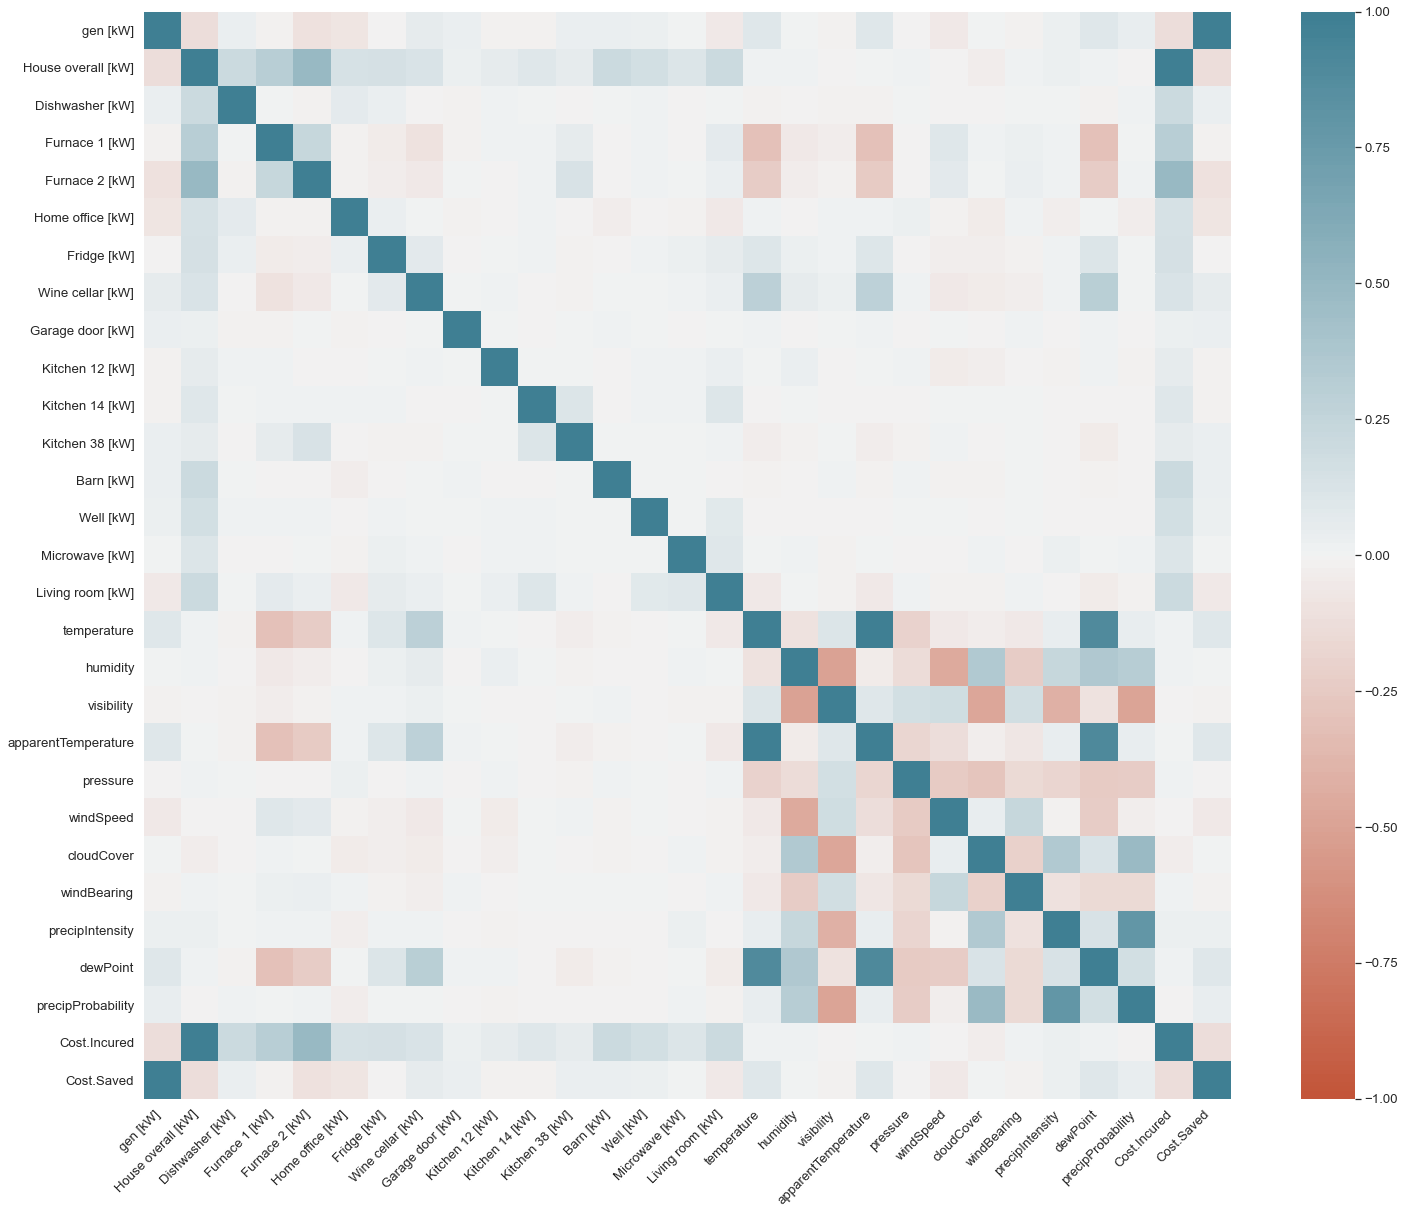

In [17]:
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
test_df = df.copy()
test_df.drop('time', axis=1, inplace=True)
test_df.drop('summary', axis=1, inplace=True)
corr = test_df.corr()

#corr.style.background_gradient(cmap='coolwarm')
pyplot.figure(figsize = (25,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# T-Test

In [18]:

types_map = df.dtypes.to_dict()
num_columns = [          
'Dishwasher [kW]',             
'Furnace 1 [kW]',                
'Furnace 2 [kW]',                
'Home office [kW]',              
'Fridge [kW]',                   
'Wine cellar [kW]',              
'Garage door [kW]',              
'Kitchen 12 [kW]',               
'Kitchen 14 [kW]',               
'Kitchen 38 [kW]',               
'Barn [kW]',                     
'Well [kW]',                     
'Microwave [kW]',                
'Living room [kW]']


print(num_columns)

for i in range(len(num_columns)-1):
    for j in range(i+1,len(num_columns)):
        col1 = num_columns[i]
        col2 = num_columns[j]
        t_val, p_val = stats.ttest_ind(df[col1], df[col2])
        print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))

['Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]']
(Dishwasher [kW],Furnace 1 [kW]) => t-value=-188.83322552742646, p-value=0.0
(Dishwasher [kW],Furnace 2 [kW]) => t-value=-286.1721793337311, p-value=0.0
(Dishwasher [kW],Home office [kW]) => t-value=-162.8052306239252, p-value=0.0
(Dishwasher [kW],Fridge [kW]) => t-value=-111.14078014432731, p-value=0.0
(Dishwasher [kW],Wine cellar [kW]) => t-value=-38.30824517058043, p-value=0.0
(Dishwasher [kW],Garage door [kW]) => t-value=63.86837358121533, p-value=0.0
(Dishwasher [kW],Kitchen 12 [kW]) => t-value=105.67630850369983, p-value=0.0
(Dishwasher [kW],Kitchen 14 [kW]) => t-value=83.97351980175974, p-value=0.0
(Dishwasher [kW],Kitchen 38 [kW]) => t-value=116.57472346760788, p-value=0.0
(Dishwasher [kW],Barn [kW]) => t-value=-69.23756195423603,

It can be seen from the results that all the ttest are significant.

# Exporting Transformed data into csv.

In [19]:
df.to_csv('smart.clean.csv')